# Exploratory Data Analysis
### Descriptive Statistics

This file gives descriptive statistics and overall distributions in the data.

* data has already been cleansed and processed by load_data.PreProcessing()
* filter down features that matter to the problem
* findings inform final model selection

### Dependencies

In [7]:
from dotenv import load_dotenv
import sys
import warnings

from __init__ import get_base_path
import data.load_data as load_data

import numpy as np
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

load_dotenv()
warnings.filterwarnings('ignore')

In [8]:
random_seed = int(os.getenv('RANDOM_SEED'))
random_seed

42

### Read & Describe Dataframe

In [9]:
csv_file = load_data.combined_csv
# csv_vile = load_data.combined_sample_csv

In [10]:
if os.path.exists(csv_file):
    pass
else:
    load_data.__main__()

df = pd.read_csv(csv_file,index_col=0)
dp = load_data.DataPreprocessor(df)
df = dp.preprocess().get_dataframe()

pd.set_option('display.max_columns', df.shape[1])
pd.set_option('display.max_rows', df.shape[0])
df.head()

,R1_voltage_AC_phase_A_angle,R1_voltage_AC_phase_A_magnitude,R1_voltage_AC_phase_B_angle,R1_voltage_AC_phase_B_magnitude,R1_voltage_AC_phase_C_angle,R1_voltage_AC_phase_C_magnitude,R1_current_AC_phase_A_angle,R1_current_AC_phase_A_magnitude,R1_current_AC_phase_B_angle,R1_current_AC_phase_B_magnitude,R1_current_AC_phase_C_angle,R1_current_AC_phase_C_magnitude,R1_pos_neg_zero_voltage_phase_A_angle,R1_pos_neg_zero_voltage_phase_A_magnitude,R1_pos_neg_zero_voltage_phase_B_angle,R1_pos_neg_zero_voltage_phase_B_magnitude,R1_pos_neg_zero_voltage_phase_C_angle,R1_pos_neg_zero_voltage_phase_C_magnitude,R1_pos_neg_zero_current_phase_A_angle,R1_pos_neg_zero_current_phase_A_magnitude,R1_pos_neg_zero_current_phase_B_angle,R1_pos_neg_zero_current_phase_B_magnitude,R1_pos_neg_zero_current_phase_C_angle,R1_pos_neg_zero_current_phase_C_magnitude,R1_frequency_for_relays,R1_frequency_delta_dFdt_for_relays,R1_appearance_impedance_for_relays,R1_appearance_impedance_angle_for_relays,R1_status_flag_for_relays,R2_voltage_AC_phase_A_angle,R2_voltage_AC_phase_A_magnitude,R2_voltage_AC_phase_B_angle,R2_voltage_AC_phase_B_magnitude,R2_voltage_AC_phase_C_angle,R2_voltage_AC_phase_C_magnitude,R2_current_AC_phase_A_angle,R2_current_AC_phase_A_magnitude,R2_current_AC_phase_B_angle,R2_current_AC_phase_B_magnitude,R2_current_AC_phase_C_angle,R2_current_AC_phase_C_magnitude,R2_pos_neg_zero_voltage_phase_A_angle,R2_pos_neg_zero_voltage_phase_A_magnitude,R2_pos_neg_zero_voltage_phase_B_angle,R2_pos_neg_zero_voltage_phase_B_magnitude,R2_pos_neg_zero_voltage_phase_C_angle,R2_pos_neg_zero_voltage_phase_C_magnitude,R2_pos_neg_zero_current_phase_A_angle,R2_pos_neg_zero_current_phase_A_magnitude,R2_pos_neg_zero_current_phase_B_angle,R2_pos_neg_zero_current_phase_B_magnitude,R2_pos_neg_zero_current_phase_C_angle,R2_pos_neg_zero_current_phase_C_magnitude,R2_frequency_for_relays,R2_frequency_delta_dFdt_for_relays,R2_appearance_impedance_for_relays,R2_appearance_impedance_angle_for_relays,R2_status_flag_for_relays,R3_voltage_AC_phase_A_angle,R3_voltage_AC_phase_A_magnitude,R3_voltage_AC_phase_B_angle,R3_voltage_AC_phase_B_magnitude,R3_voltage_AC_phase_C_angle,R3_voltage_AC_phase_C_magnitude,R3_current_AC_phase_A_angle,R3_current_AC_phase_A_magnitude,R3_current_AC_phase_B_angle,R3_current_AC_phase_B_magnitude,R3_current_AC_phase_C_angle,R3_current_AC_phase_C_magnitude,R3_pos_neg_zero_voltage_phase_A_angle,R3_pos_neg_zero_voltage_phase_A_magnitude,R3_pos_neg_zero_voltage_phase_B_angle,R3_pos_neg_zero_voltage_phase_B_magnitude,R3_pos_neg_zero_voltage_phase_C_angle,R3_pos_neg_zero_voltage_phase_C_magnitude,R3_pos_neg_zero_current_phase_A_angle,R3_pos_neg_zero_current_phase_A_magnitude,R3_pos_neg_zero_current_phase_B_angle,R3_pos_neg_zero_current_phase_B_magnitude,R3_pos_neg_zero_current_phase_C_angle,R3_pos_neg_zero_current_phase_C_magnitude,R3_frequency_for_relays,R3_frequency_delta_dFdt_for_relays,R3_appearance_impedance_for_relays,R3_appearance_impedance_angle_for_relays,R3_status_flag_for_relays,R4_voltage_AC_phase_A_angle,R4_voltage_AC_phase_A_magnitude,R4_voltage_AC_phase_B_angle,R4_voltage_AC_phase_B_magnitude,R4_voltage_AC_phase_C_angle,R4_voltage_AC_phase_C_magnitude,R4_current_AC_phase_A_angle,R4_current_AC_phase_A_magnitude,R4_current_AC_phase_B_angle,R4_current_AC_phase_B_magnitude,R4_current_AC_phase_C_angle,R4_current_AC_phase_C_magnitude,R4_pos_neg_zero_voltage_phase_A_angle,R4_pos_neg_zero_voltage_phase_A_magnitude,R4_pos_neg_zero_voltage_phase_B_angle,R4_pos_neg_zero_voltage_phase_B_magnitude,R4_pos_neg_zero_voltage_phase_C_angle,R4_pos_neg_zero_voltage_phase_C_magnitude,R4_pos_neg_zero_current_phase_A_angle,R4_pos_neg_zero_current_phase_A_magnitude,R4_pos_neg_zero_current_phase_B_angle,R4_pos_neg_zero_current_phase_B_magnitude,R4_pos_neg_zero_current_phase_C_angle,R4_pos_neg_zero_current_phase_C_magnitude,R4_frequency_for_relays,R4_frequency_delta_dFdt_for_relays,R4_appearance_impedance_for_relays,R4_appearance_impedance_angle_for_relays,R4_status_flag_for_re

### Dtypes, Nulls, Numeric Attributes

In [11]:
print(df.shape)
print(df.info(memory_usage=True))

(78377, 135)
<class 'pandas.core.frame.DataFrame'>
Index: 78377 entries, 0 to 78376
Columns: 135 entries, R1_voltage_AC_phase_A_angle to synthetic_datetime
dtypes: bool(5), category(1), datetime64[ns](1), float64(124), int64(2), object(2)
memory usage: 78.2+ MB
None


In [12]:
pd.concat({'dtypes':df.dtypes, 
           'count_null':df.isnull().sum(), 
           'describe':df.select_dtypes('number').describe().round(2).T},axis=1)

dtypes count_null describe  \
                                                        0          1    count   
R1_voltage_AC_phase_A_angle                       float64          0  78377.0   
R1_voltage_AC_phase_A_magnitude                   float64          0  78377.0   
R1_voltage_AC_phase_B_angle                       float64          0  78377.0   
R1_voltage_AC_phase_B_magnitude                   float64          0  78377.0   
R1_voltage_AC_phase_C_angle                       float64          0  78377.0   
R1_voltage_AC_phase_C_magnitude                   float64          0  78377.0   
R1_current_AC_phase_A_angle                       float64          0  78377.0   
R1_current_AC_phase_A_magnitude                   float64          0  78377.0   
R1_current_AC_phase_B_angle                       float64          0  78377.0   
R1_current_AC_phase_B_magnitude                   float64          0  78377.0   
R1_current_AC_phase_C_angle                       float64          0  78377.0   
R1_current_AC_phase_C_magnitude                   float64          0  78377.0   
R1_pos_neg_zero_voltage_phase_A_angle             float64          0  78377.0   
R1_pos_neg_zero_voltage_phase_A_magnitude         float64          0  78377.0   
R1_pos_neg_zero_voltage_phase_B_angle             float64          0  78377.0   
R1_pos_neg_zero_voltage_phase_B_magnitude         float64          0  78377.0   
R1_pos_neg_zero_voltage_phase_C_angle             float64          0  78377.0   
R1_pos_neg_zero_voltage_phase_C_magnitude         float64          0  78377.0   
R1_pos_neg_zero_current_phase_A_angle             float64          0  78377.0   
R1_pos_neg_zero_current_phase_A_magnitude         float64          0  78377.0   
R1_pos_neg_zero_current_phase_B_angle             float64          0  78377.0   
R1_pos_neg_zero_current_phase_B_magnitude         float64          0  78377.0   
R1_pos_neg_zero_current_phase_C_angle             float64          0  78377.0   
R1_pos_neg_zero_current_phase_C_magnitude         float64          0  78377.0   
R1_frequency_for_relays                           float64          0  78377.0   
R1_frequency_delta_dFdt_for_relays                float64          0  78377.0   
R1_appearance_impedance_for_relays                float64          0  78377.0   
R1_appearance_impedance_angle_for_relays          float64          0  78377.0   
R1_status_flag_for_relays                            bool          0      NaN   
R2_voltage_AC_phase_A_angle                       float64          0  78377.0   
R2_voltage_AC_phase_A_magnitude                   float64          0  78377.0   
R2_voltage_AC_phase_B_angle                       float64          0  78377.0   
R2_voltage_AC_phase_B_magnitude                   float64          0  78377.0   
R2_voltage_AC_phase_C_angle                       float64          0  78377.0   
R2_voltage_AC_phase_C_magnitude                   float64          0  78377.0   
R2_current_AC_phase_A_angle                       float64          0  78377.0   
R2_current_AC_phase_A_magnitude                   float64          0  78377.0   
R2_current_AC_phase_B_angle                       float64          0  78377.0   
R2_current_AC_phase_B_magnitude                   float64          0  78377.0   
R2_current_AC_phase_C_angle                       float64          0  78377.0   
R2_current_AC_phase_C_magnitude                   float64          0  78377.0   
R2_pos_neg_zero_voltage_phase_A_angle             float64          0  78377.0   
R2_pos_neg_zero_voltage_phase_A_magnitude         float64          0  78377.0   
R2_pos_neg_zero_voltage_phase_B_angle             float64          0  78377.0   
R2_pos_neg_zero_voltage_phase_B_magnitude         float64          0  78377.0   
R2_pos_neg_zero_voltage_phase_C_angle             float64          0  78377.0   
R2_pos_neg_zero_voltage_phase_C_magnitude         float64          0  78377.0   
R2_pos_neg_zero_current_phase_A_angle             float64          0  78377.0   
R

### Class Attributes

In [13]:
df.select_dtypes(['object','boolean','category']).describe().T

,count,unique,top,freq
R1_status_flag_for_relays,78377,2,False,75975
R2_status_flag_for_relays,78377,2,False,78165
R3_status_flag_for_relays,78377,2,False,77106
R4_status_flag_for_relays,78377,2,False,77478
marker,78377,37,36,4685
scenario_type,78377,36,Fault from 50-90% on L1 with R1 and R2 disable...,4685
scenario_class,78377,3,attack,55663
is_attack,78377,2,True,55663


In [14]:
for i in df.select_dtypes(['object','boolean','category']):
    print(i, df[i].unique())

R1_status_flag_for_relays [False  True]
R2_status_flag_for_relays [False  True]
R3_status_flag_for_relays [False  True]
R4_status_flag_for_relays [False  True]
marker [41, 40, 39, 38, 37, ..., 5, 4, 3, 2, 1]
Length: 37
Categories (37, int64): [1, 2, 3, 4, ..., 38, 39, 40, 41]
scenario_type ['normal operation load changes' 'L1 maintenance with R1 and R2 disabled'
 'Fault from 50-90% on L1 with R3 and R4 disabled & fault'
 'Fault from 10-49% on L1 with R3 and R4 disabled & fault'
 'Fault from 50-90% on L1 with R1 and R2 disabled & fault'
 'Fault from 10-49% on L1 with R1 and R2 disabled & fault'
 'Fault from 80-90% on L2 with R4 disabled & fault'
 'Fault from 10-79% on L2 with R4 disabled & fault'
 'Fault from 50-90% on L2 with R3 disabled & fault'
 'Fault from 20-90% on L2 with R3 disabled & fault'
 'Fault from 10-19% on L2 with R3 disabled & fault'
 'Fault from 80-90% on L1 with R2 disabled & fault'
 'Fault from 50-79% on L1 with R2 disabled & fault'
 'Fault from 10-49% on L1 with R2 d

In [15]:
df['sample_id'].nunique()

553

### Useful Features

In [16]:
print(dp.id_cols)
print(dp.status_cols) # log, status flag columns
print(dp.target_features)
print(dp.R1_features) # available for R1, R2, R3, R4
print(dp.magnitudes) # this will need to be log scaled

['source_file', 'sample_id', 'scenario_type']
['control_panel_log1', 'control_panel_log2', 'control_panel_log3', 'control_panel_log4', 'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log', 'snort_log1', 'snort_log2', 'snort_log3', 'snort_log4', 'R1_status_flag_for_relays', 'R2_status_flag_for_relays', 'R3_status_flag_for_relays', 'R4_status_flag_for_relays']
['is_attack', 'scenario_class', 'marker']
['R1_voltage_AC_phase_A_angle', 'R1_voltage_AC_phase_A_magnitude', 'R1_voltage_AC_phase_B_angle', 'R1_voltage_AC_phase_B_magnitude', 'R1_voltage_AC_phase_C_angle', 'R1_voltage_AC_phase_C_magnitude', 'R1_current_AC_phase_A_angle', 'R1_current_AC_phase_A_magnitude', 'R1_current_AC_phase_B_angle', 'R1_current_AC_phase_B_magnitude', 'R1_current_AC_phase_C_angle', 'R1_current_AC_phase_C_magnitude', 'R1_pos_neg_zero_voltage_phase_A_angle', 'R1_pos_neg_zero_voltage_phase_A_magnitude', 'R1_pos_neg_zero_voltage_phase_B_angle', 'R1_pos_neg_zero_voltage_phase_B_magnitude', 'R1_pos_neg_zero_voltage_p

### Distribution of Cyber Attacks / Event Types

Using matplotlib backend: module://matplotlib_inline.backend_inline


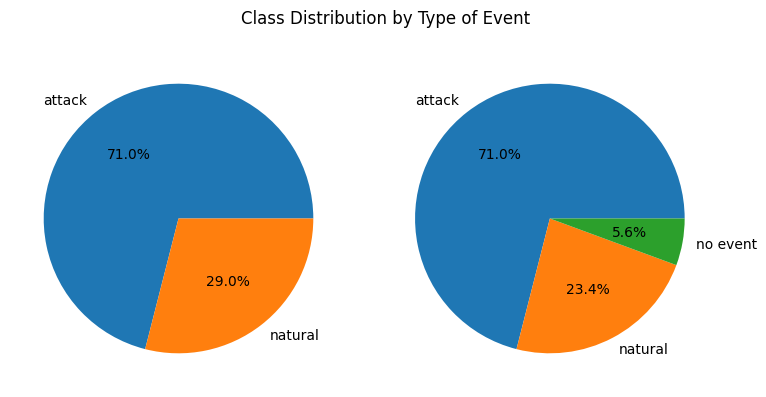

In [17]:
%matplotlib
# evidently most of the classes are attacks, followed by normal anomalies. the smallest class is normal baseline
binary_class_counts = df['is_attack'].value_counts()
tertiary_class_counts = df['scenario_class'].value_counts()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
fig.suptitle("Class Distribution by Type of Event")
ax1.pie(binary_class_counts, labels=['attack','natural'], autopct='%1.1f%%')
ax2.pie(tertiary_class_counts, labels=tertiary_class_counts.index, autopct='%1.1f%%')
plt.tight_layout()
plt.show()

Using matplotlib backend: module://matplotlib_inline.backend_inline


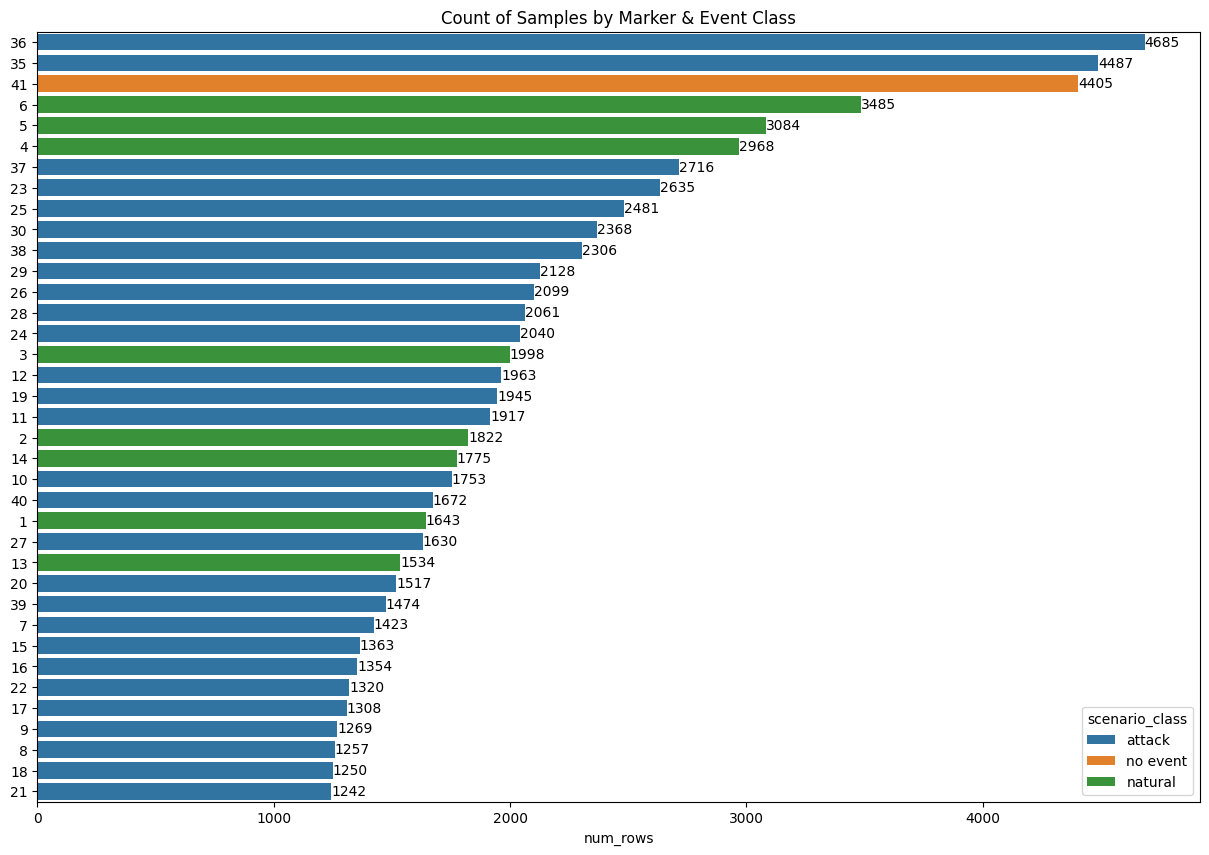

In [22]:
%matplotlib

# get marker class sizes
class_counts = df.loc[:,['scenario_class','marker','snort_log1']].groupby(['scenario_class','marker']).count()
class_counts.columns = ['num_rows']
filt = class_counts['num_rows'] != 0
class_counts = class_counts.loc[filt,:].sort_values(by='num_rows',ascending=False)

# visualize overall class sizes by row count
plt.figure(figsize=(15,10))

g = sns.barplot(x=class_counts['num_rows'], y=[str(i) for i in class_counts.index.get_level_values(1).to_list()], hue=class_counts.index.get_level_values(0))
for i in g.containers:
    g.bar_label(i)

plt.title('Count of Samples by Marker & Event Class')
plt.show()